# Neural Style Transfer

[Original paper](https://arxiv.org/abs/1508.06576) by Gatys et al.

## Math

### Content and Style

Let $C_{nn}$ be a pre-trained network. $C_{nn}(X)$ is the network fed by $X$. Define $F_{XL} \in C_{nn}(X)$ as the feature maps of $C_{nn}(X)$ at layer $L$.

We define the content of $X$ at layer $L$ simply be $F_{XL}$. So with another picture $Y$, the distance of **content** between $X$ and $Y$ is defined as:

$$ D_C^L(X,Y) = ||F_{XL} - F_{YL}||^2 = \sum_{i}(F_{XL}(i) - F_{YL}(i))^2 $$

Then, we define the style of the image $X$ at layer $L$ as the gram matrix of $F_{XL}$. That is

$$ G_{XL}(k, l) = \langle F_{XL}^k, F_{XL}^l\rangle = \sum_{i}F_{XL}^k(i) \cdot F_{YL}^l(i)$$

So we can define the distance of **style** between two images, $X$ and $Y$, as:

$$ D_S^L(X,Y) = ||G_{XL} - G_{YL}||^2 = \sum_{k, l}(G_{XL}(k, l) - G_{YL}(k, l))^2 $$

### Loss function

We define the total loss (content & style) as


In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [2]:
# check cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## load images

In [3]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("images/picasso.jpg")
content_img = image_loader("images/dancing.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

## display images

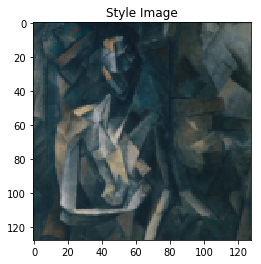

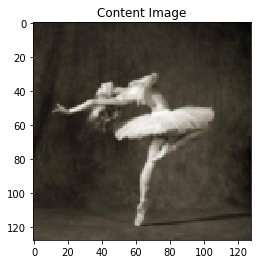

In [4]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')